In [10]:
#############
## IMPORTS ##
#############
# For plotting
import matplotlib.pyplot as plt
# For arrays and number ranges
import numpy as np
# The machine learning algorithm
from sklearn.linear_model import BayesianRidge

In [8]:
##############################
##  FORMAT SEQUENTIAL DATA  ##
##############################
def format_sequential_data (y, seq=2):
    """
        Inputs:
            y (a list or NumPy array): the y values of a data set
            seq (an int): the length of the sequence.  Default value is 2
        Returns:
            inputs (a list): the inputs for a machine learning model using 
                sequential data formatting
            outputs (a list): the outputs for a machine learning model using
                sequential data formatting              
        Formats a given list or array in sequential formatting using the 
        given sequence lenght.  Default sequence length is two.

        Explanation of sequential formatting:
        Typically data points of the form (x,y) are used to train a machine
        learning model.  This teaches the model the relationship between the
        x data and the y data in the training range.  This model works well 
        for interpolation, but not so well for extrapolation.  A better data
        model for extrapolation would be one that learns the patterns in the y
        data to better guess what y value should come next.  Therefore, this 
        method formats the data in a sequential pattern so that the points are
        of the form ((y1, y2, ..., yn), yn+1) where n is the lenght of the 
        sequence (seq).
    """
    # Make sure seq is an int
    assert isinstance(seq, int)
    # Set up the input and output lists
    inputs = []
    outputs = []
    # Cycle through the whole y list/array and separate the points into 
    # sequential format
    for i in range(0, len(y)-seq):
        inputs.append(y[i:i+seq])
        outputs.append(y[i+seq])
    # Return the input and output lists.  NOTE: the data type of the return 
    # values is LIST
    return inputs, outputs  

In [9]:
####################################
## SEQUENTIAL EXTRAPOLATE SKLEARN ##
####################################
def sequential_extrapolate_sklearn (R, y_train, num_points, seq):
    """
        Inputs:
            R (an object): A trained Scikit-Learn regression model
            y_train (a list): the y component of the training data set, unformatted
            num_points (an int): the number of points to be in the extrapolated data set
            seq (an int): the SRE length of sequence that R was trained with
        Returns:
            y_test (a list): the extrapolated data set
            y_std (a list): the uncertainity on each point in the extrapoalted set
        Performs SRE using a trained Scikit-Learn regression model.
    """
    # Make sure inputs are of the proper type
    assert isinstance(num_points, int)
    assert isinstance(seq, int)

    # Add the training data to the extrapolated data set and no uncertainities for the
    # training data
    y_test = y_train.copy()
    y_std = np.zeros(len(y_train)).tolist()

    # Extrapolate until enough data points have been predicted
    while len(y_test) < num_points:
        next_test = y_test[-seq:]
        point,std = R.predict([next_test],return_std=True)
        y_test.append(point[0])
        y_std.append(std[0])

    # Return the predicted data set and uncertainities
    return y_test,y_std

In [16]:
####################################
## RMSE (Root Mean Squared Error) ##
####################################  
def rmse(A,B):
    """
        Inputs:
            A,B (lists or NumPy arrays): the data.  A and B must be the same
                length.
        Returns:
            Unnamed (a float): the RMSE score between A and B
        Computes the RMSE score between two data sets.
    """
    assert len(A)==len(B)
    return np.sqrt(np.average((np.asarray(A)-np.asarray(B))**2))

(0.0, 95.0)

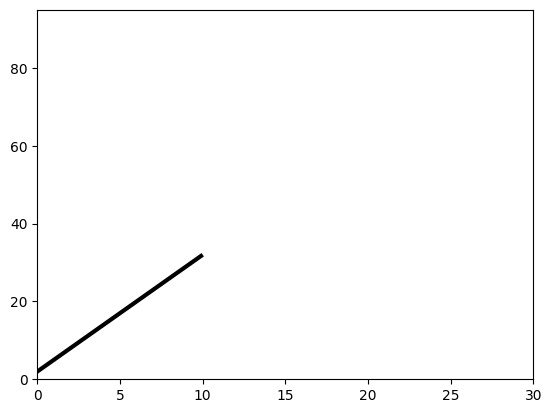

In [27]:
# Example 1: Linear
X = np.arange(0,10,0.1)
y = 3*X+2
plt.plot(X,y,linewidth=3,color="black")
plt.xlim(0,30)
plt.ylim(0,95)

100


91.69999998863477

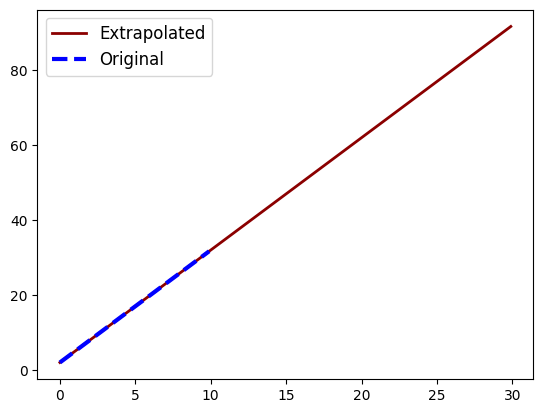

In [26]:
# Example 1: Linear --> Extrapolated

# Create the training data set
X = np.arange(0,10,0.1)
y = 3*X+2

# Format the data sequentially
X_train, y_train = format_sequential_data(y, seq=4)

# Define the machine learning algorithm and train on the training data
R = BayesianRidge()
R.fit(X_train, y_train)

# Use the sequential_extrapolate_sklearn function to extrapolate
# the data set
ypred, ystd = sequential_extrapolate_sklearn (R, y.tolist(), 300, 4)

# Define the test or true data set that corresponds to the extrapolated
# data
X_test = np.arange(0,30,0.1)
y_test = 3*X_test+2

# Plot the extrapolated data set along with the original
# Add a legend
plt.plot(X_test, ypred, label="Extrapolated", linewidth=2, color="darkred")
plt.plot(X,y, label="Original", linewidth=3, color="blue",linestyle="--")
plt.legend(fontsize=12)

# Calculate the RMSE between the true and predicted extrapolated data
rmse(y_test, ypred)



(-10.0, 10.0)

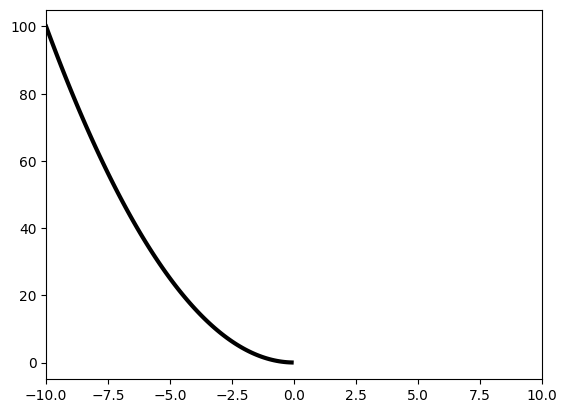

In [29]:
# Example 2: Half Quadratic

X = np.arange(-10, 0, 0.1)
y = X**2

plt.plot(X,y, linewidth=3, color="black")
plt.xlim(-10,10)

6.400589551811489e-06

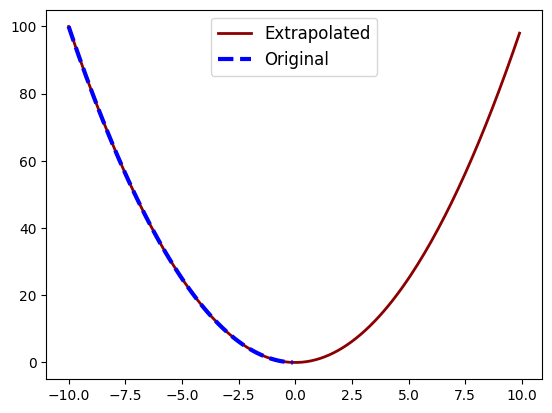

In [30]:
# Example 2: Half Quadratic --> Extrapolated

# Create the training data set
X = np.arange(-10, 0, 0.1)
y = X**2

# Format the data sequentially
X_train, y_train = format_sequential_data(y, seq=4)

# Define the machine learning algorithm and train on the training data
R = BayesianRidge()
R.fit(X_train, y_train)

# Use the sequential_extrapolate_sklearn function to extrapolate
# the data set
ypred, ystd = sequential_extrapolate_sklearn (R, y.tolist(), 200, 4)

# Define the test or true data set that corresponds to the extrapolated
# data
X_test = np.arange(-10,10,0.1)
y_test = X_test**2

# Plot the extrapolated data set along with the original
# Add a legend
plt.plot(X_test, ypred, label="Extrapolated", linewidth=2, color="darkred")
plt.plot(X,y, label="Original", linewidth=3, color="blue",linestyle="--")
plt.legend(fontsize=12)

# Calculate the RMSE between the true and predicted extrapolated data
rmse(y_test, ypred)


(0.0, 25.132741228718345)

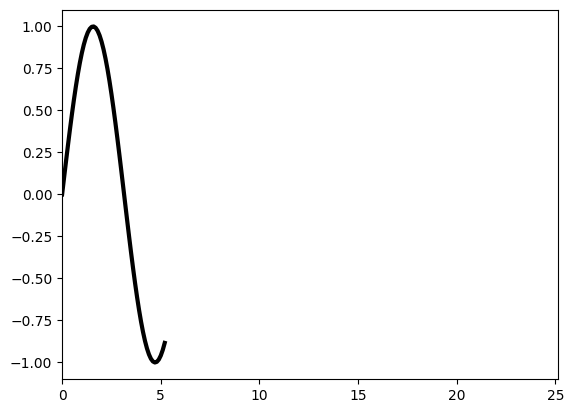

In [39]:
# Example 3: Half-ish Period Sine
X = np.arange(0,5*np.pi/3, 0.1)
y = np.sin(X)

plt.plot(X,y, linewidth=3, color="black")
plt.xlim(0, 8*np.pi)

2.360707780431819e-06

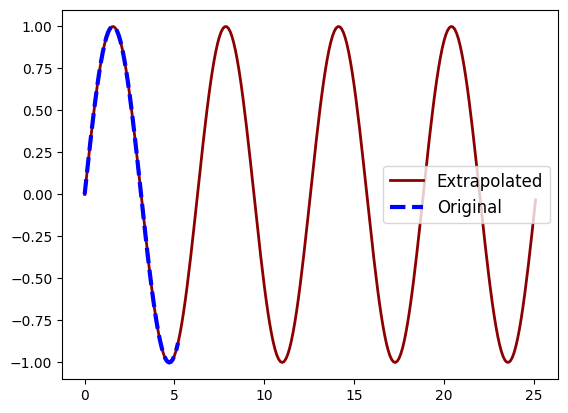

In [45]:
# Example 3: Half-ish Period Sine --> Extrapolated

# Create the training data set
X = np.arange(0,5*np.pi/3, 0.1)
y = np.sin(X)

# Format the data sequentially
X_train, y_train = format_sequential_data(y, seq=4)

# Define the machine learning algorithm and train on the training data
R = BayesianRidge()
R.fit(X_train, y_train)

# Use the sequential_extrapolate_sklearn function to extrapolate
# the data set
ypred, ystd = sequential_extrapolate_sklearn (R, y.tolist(), 252, 4)

# Define the test or true data set that corresponds to the extrapolated
# data
X_test = np.arange(0,8*np.pi,0.1)
y_test = np.sin(X_test)

# Plot the extrapolated data set along with the original
# Add a legend
plt.plot(X_test, ypred, label="Extrapolated", linewidth=2, color="darkred")
plt.plot(X,y, label="Original", linewidth=3, color="blue",linestyle="--")
plt.legend(fontsize=12)

# Calculate the RMSE between the true and predicted extrapolated data
rmse(y_test, ypred)

(-1.0, 25.132741228718345)

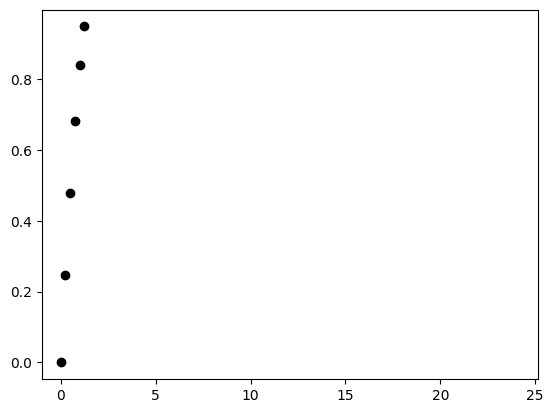

In [61]:
# Example 4: Few Points from Sine

X = np.arange(0, np.pi/2,0.25)[:-1]
y = np.sin(X)

plt.scatter(X,y,color="black")
plt.xlim(-1,8*np.pi)

0.09251145029863955

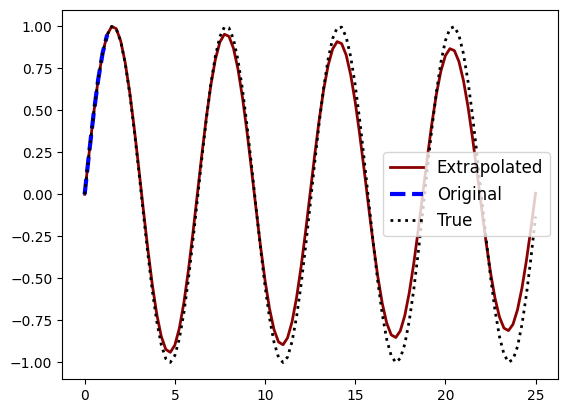

In [66]:
# Example 4: Few Points from Sine --> Extrapolated

# Create the training data set
X = np.arange(0,np.pi/2, 0.25)[:-1]
y = np.sin(X)

# Format the data sequentially
X_train, y_train = format_sequential_data(y, seq=2)

# Define the machine learning algorithm and train on the training data
R = BayesianRidge()
R.fit(X_train, y_train)

# Use the sequential_extrapolate_sklearn function to extrapolate
# the data set
ypred, ystd = sequential_extrapolate_sklearn (R, y.tolist(), 101, 2)

# Define the test or true data set that corresponds to the extrapolated
# data
X_test = np.arange(0,8*np.pi,0.25)
y_test = np.sin(X_test)

# Plot the extrapolated data set along with the original
# Plot the true data as well for comparison
# Add a legend
plt.plot(X_test, ypred, label="Extrapolated", linewidth=2, color="darkred")
plt.plot(X,y, label="Original", linewidth=3, color="blue",linestyle="--")
plt.plot(X_test, y_test, color="black", linewidth=2, linestyle=":",label="True")
plt.legend(fontsize=12)

# Calculate the RMSE between the true and predicted extrapolated data
rmse(y_test, ypred)